In [63]:
import pandas as pd
import prince
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
import altair as alt

alt.data_transformers.enable("vegafusion")
pd.set_option("display.max_columns", None)

In [47]:
train_df = pd.read_csv("resources/train_data.csv", low_memory=False)

# Exploratory Data Analysis

## General Description

In [48]:
print(train_df.shape)
train_df.head()

(593471, 33)


,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Identifier,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,5393875,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,NaN,M,NaN,44.0,RETAIL TRADE,I,NaN,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
1,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,5393091,4. TEMPORARY,WYOMING,N,ROCHESTER,2020-02-21,F,4.0,23.0,CONSTRUCTION,I,NaN,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
2,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,1A. PRIVATE,5393889,4. TEMPORARY,ORANGE,N,ALBANY,NaN,M,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,II,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
3,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,957648180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,2A. SIF,5393887,2. NON-COMP,DUTCHESS,N,ALBANY,NaN,M,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,II,NaN,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0


## FAMD

Assumptions:
 - Check dtypes
 - Check nans
 - Scale num
 - Low cardinality of cat (uses one hot)
 

In [136]:
train_df_sample = prince.datasets.load_beers()
train_df_sample.columns

Index(['is_organic', 'style', 'alcohol_by_volume',
       'international_bitterness_units', 'standard_reference_method',
       'final_gravity'],
      dtype='object')

In [130]:
famd = prince.FAMD(
    n_components=30,
    n_iter=3,
    copy=True,
    check_input=True,
    random_state=42,
    engine="sklearn",
    handle_unknown="error",
)
famd = famd.fit(train_df_sample)

c:\Users\Diogo\OneDrive - NOVAIMS\IMS - Data Science\MDS\.studyenv\Lib\site-packages\prince\pca.py:178: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-0.9847149779664874, -0.17417351167287262, -0.009205356129783685, -0.0617514061898721, -0.17465935225865403, -0.06071349351019388, -0.11103811780095724, -0.14999364447174682, -0.0544596212956454, -0.3755627362599292, -0.07277473010777251, -0.19903589334614574, -0.13669256459475115, -0.07756570946498441, -0.019527509227821593, -0.05748743060504355, -0.2522670701629242, -0.10774593107042146, -0.08411701108133954, -0.13777315504355966, -0.05083824087261927, -0.03254584871303599, -0.0627721597417262, -0.09957115060452547, -0.08757192257562478, -0.07729210822631441, -0.09850161206304558, -0.07450085292590662, -0.07392995675104527, -0.031216881442188937, -0.11716505536692956, -0.10950118391540191, -0.0145549460215545, -0.07562971803226468, -0.05523213677870212, -0.10616134577296688, -0.16402591142461723, -0.069193

In [127]:
famd.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,3.647,2.97%,2.97%
1,1.913,1.56%,4.52%
2,1.272,1.03%,5.55%
3,1.165,0.95%,6.50%
4,1.103,0.90%,7.40%
...,...,...,...
95,1.000,0.81%,81.38%
96,1.000,0.81%,82.19%
97,1.000,0.81%,83.01%


In [131]:
df_eigenvalues = pd.DataFrame(famd.eigenvalues_summary)

df_eigenvalues["% of variance"] = (
    df_eigenvalues["% of variance"].astype(str).str.replace("%", "").astype(float)
)
df_eigenvalues["% of variance (cumulative)"] = (
    df_eigenvalues["% of variance (cumulative)"]
    .astype(str)
    .str.replace("%", "")
    .astype(float)
)
df_eigenvalues

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,3.646,2.96,2.96
1,1.896,1.54,4.51
2,1.176,0.96,5.46
3,1.106,0.90,6.36
4,1.055,0.86,7.22
5,1.000,0.81,8.03
6,1.000,0.81,8.85
7,1.000,0.81,9.66
8,1.000,0.81,10.47


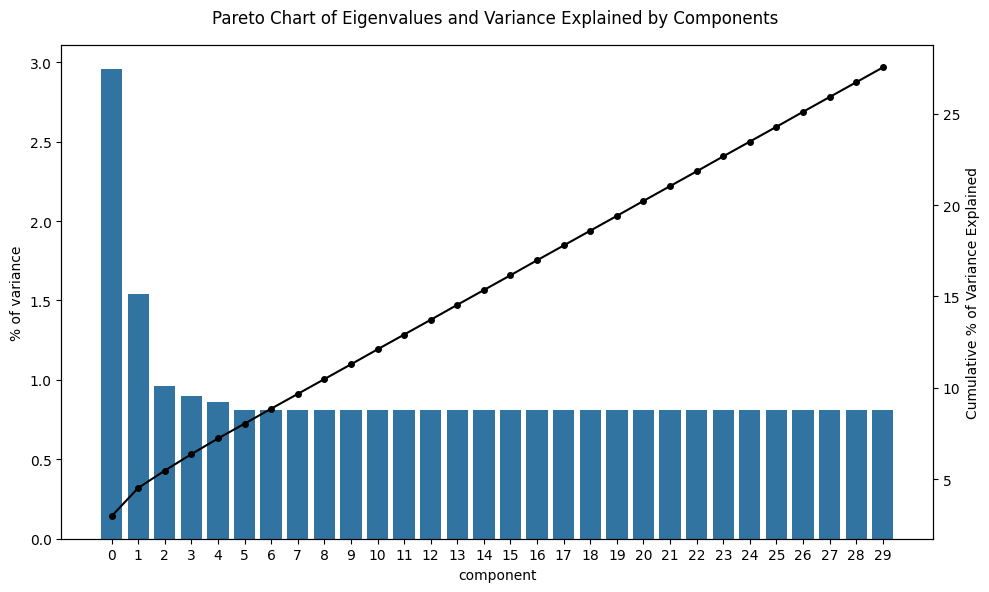

In [135]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(
    data=df_eigenvalues, x=df_eigenvalues.index, y="% of variance", ax=ax, errorbar=None
)
ax2 = ax.twinx()
ax2.plot(
    df_eigenvalues.index,
    df_eigenvalues["% of variance (cumulative)"],
    color="black",
    marker="o",
    markersize=4,
)
ax2.set_ylabel("Cumulative % of Variance Explained")

fig.suptitle("Pareto Chart of Eigenvalues and Variance Explained by Components")
fig.tight_layout()
plt.show()

In [56]:
famd.column_contributions_.style.format("{:.0%}")

component,0,1,2,3
variable,,,,
alcohol_by_volume,23%,2%,1%,3%
international_bitterness_units,18%,13%,4%,0%
standard_reference_method,9%,29%,2%,0%
final_gravity,23%,2%,3%,2%
is_organic,0%,0%,0%,1%
style,27%,54%,91%,93%


In [141]:
famd.plot(train_df_sample, x_component=6, y_component=1)

c:\Users\Diogo\OneDrive - NOVAIMS\IMS - Data Science\MDS\.studyenv\Lib\site-packages\prince\pca.py:178: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-0.9847149779664874, -0.17417351167287262, -0.009205356129783685, -0.0617514061898721, -0.17465935225865403, -0.06071349351019388, -0.11103811780095724, -0.14999364447174682, -0.0544596212956454, -0.3755627362599292, -0.07277473010777251, -0.19903589334614574, -0.13669256459475115, -0.07756570946498441, -0.019527509227821593, -0.05748743060504355, -0.2522670701629242, -0.10774593107042146, -0.08411701108133954, -0.13777315504355966, -0.05083824087261927, -0.03254584871303599, -0.0627721597417262, -0.09957115060452547, -0.08757192257562478, -0.07729210822631441, -0.09850161206304558, -0.07450085292590662, -0.07392995675104527, -0.031216881442188937, -0.11716505536692956, -0.10950118391540191, -0.0145549460215545, -0.07562971803226468, -0.05523213677870212, -0.10616134577296688, -0.16402591142461723, -0.069193

alt.LayerChart(...)

## Clustering

Need EDA

## Model Training and Assessment

In [57]:
def select_best_models(data, target, model):
    skf = StratifiedKFold(n_splits=5, random_state=99, shuffle=True)
    X = data.drop(target, axis=1)
    y = data[target].copy()
    score_train, score_val = [], []

    # perform the cross-validation
    for train_index, val_index in skf.split(X, y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Apply model
        model.fit(X_train, y_train)
        predictions_train = model.predict(X_train)
        predictions_val = model.predict(X_val)
        score_train.append(f1_score(y_train, predictions_train))
        score_val.append(f1_score(y_val, predictions_val))

    avg_train = round(np.mean(score_train), 3)
    avg_val = round(np.mean(score_val), 3)
    std_train = round(np.std(score_train), 2)
    std_val = round(np.std(score_val), 2)

    return avg_train, std_train, avg_val, std_val


def show_results(models, dat):
    df = pd.DataFrame(
        columns=["Train", "Validation", "Diff"], index=list(models.keys())
    )
    count = 0
    for label, model in models.items():
        avg_train, std_train, avg_val, std_val = select_best_models(data, model)

        # store the results in the right row
        df.iloc[count] = (
            str(avg_train) + "+/-" + str(std_train),
            str(avg_val) + "+/-" + str(std_val),
            abs(avg_train - avg_val),
        )
        count += 1
    return df

In [58]:
models = {
    "Logistic Regression": LogisticRegression(C=10, penalty="l2", solver="lbfgs"),
    "KNN": KNeighborsClassifier(),
    "DT": DecisionTreeClassifier(max_depth=3, random_state=99),
    "NN": MLPClassifier(max_iter=2000, random_state=99),
    "SVC": SVC(kernel="rbf"),
}